In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r'C:\Users\akash\Downloads\loan_data.csv')

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Here are what the columns represent:

1.	credit.policy: 1 if the customer meets the credit underwriting criteria of lendco.in, and 0 otherwise.
2.  The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major purchase",                     "small_business", and "all_other").
3.	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by           lendco.in to be more risky are assigned higher interest rates.
4.	installment: The monthly installments owed by the borrower if the loan is funded.
5.	log.annual.inc: The natural log of the self-reported annual income of the borrower.
6.	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.  fico: The FICO credit score of the borrower.
8.	days.with.cr.line: The number of days the borrower has had a credit line.
9.	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit         available).
11.	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12.	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)


In [5]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Factors Affecting Interest Rate:
The interest rate of a loan can be influenced by several factors, including:

1. Credit Score (FICO): Borrowers with higher credit scores tend to receive lower interest rates.
2. Credit History: A longer and positive credit history can lead to lower interest rates.
3. Debt-to-Income Ratio (DTI): Lower DTI ratios indicate better ability to manage debt, potentially resulting in lower rates.
4. Purpose of Loan: Some purposes might be considered riskier, leading to higher interest rates.
5. Economic Conditions: Overall economic health can impact interest rates.
6. Lender's Risk Assessment: Lenders may consider additional factors specific to their lending criteria.

In [6]:
interest_rate_factors = ['credit.policy', 'fico', 'int.rate', 'dti']
correlation_matrix = data[interest_rate_factors].corr()
correlation_matrix

,credit.policy,fico,int.rate,dti
credit.policy,1.000000,0.348319,-0.294089,-0.090901
fico,0.348319,1.000000,-0.714821,-0.241191
int.rate,-0.294089,-0.714821,1.000000,0.220006
dti,-0.090901,-0.241191,0.220006,1.000000


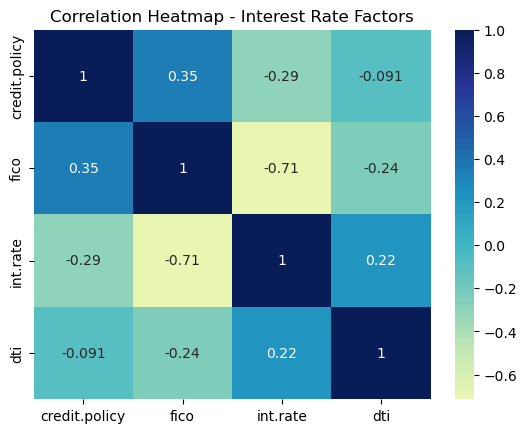

In [7]:
sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",center=0)
plt.title("Correlation Heatmap - Interest Rate Factors")
plt.show()

# Risk Evaluation Factors:
Lenders evaluate customer risk using various factors, such as:

1. Credit Score and History: Reflects the borrower's creditworthiness and repayment behavior.
2. Debt-to-Income Ratio: High DTI can suggest a higher risk of default.
3. Number of Delinquencies: Past late payments can indicate payment reliability.
4. Public Records: Bankruptcy, tax liens, and judgments suggest financial instability.
5. Inquiries: Multiple recent inquiries might indicate financial stress.
6. Purpose of Loan: Some loan purposes may carry higher default risks.

In [8]:
label_encoder = LabelEncoder()
data['purpose_encoded'] = label_encoder.fit_transform(data['purpose'])

In [9]:
risk_factors = ['fico', 'dti', 'delinq.2yrs', 'pub.rec', 'inq.last.6mths', 'purpose_encoded']
risk_corr = data[risk_factors].corr()

In [10]:
risk_corr

,fico,dti,delinq.2yrs,pub.rec,inq.last.6mths,purpose_encoded
fico,1.000000,-0.241191,-0.216340,-0.147592,-0.185293,0.057337
dti,-0.241191,1.000000,-0.021792,0.006209,0.029189,-0.053279
delinq.2yrs,-0.216340,-0.021792,1.000000,0.009184,0.021245,-0.011701
pub.rec,-0.147592,0.006209,0.009184,1.000000,0.072673,0.004793
inq.last.6mths,-0.185293,0.029189,0.021245,0.072673,1.000000,0.037516
purpose_encoded,0.057337,-0.053279,-0.011701,0.004793,0.037516,1.000000


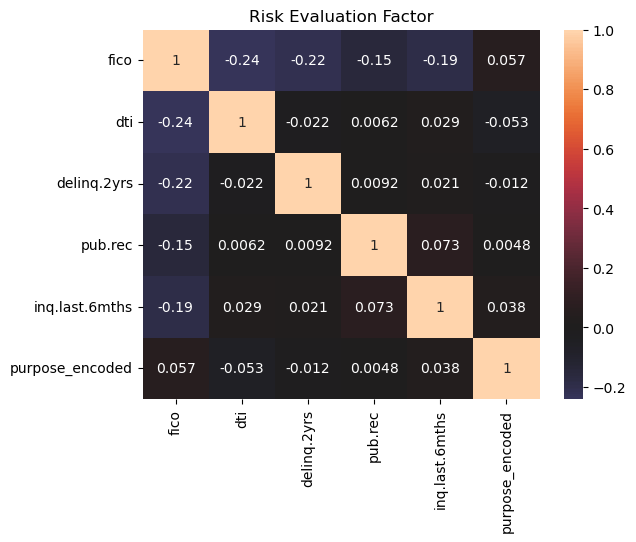

In [11]:
sns.heatmap(risk_corr,cmap="icefire",annot=True,center=0)
plt.title("Risk Evaluation Factor")
plt.show()

# Delinquency Trends and Risk Avoidance:
Analyzing delinquency trends can help identify risky customer profiles. Customers with a history of:

1. High delinquencies (delinq.2yrs) and derogatory public records (pub.rec) should be approached with caution or avoided.
2. Higher inquiries (inq.last.6mths) might indicate a financial situation that could lead to delinquencies.

In [12]:
delinquency_trends = data.groupby('purpose')[['delinq.2yrs']].mean()
delinquency_trends

,delinq.2yrs
purpose,
all_other,0.179751
credit_card,0.151347
debt_consolidation,0.163255
educational,0.157434
home_improvement,0.136725
major_purchase,0.173913
small_business,0.155089


# Optimal Loan Combination:
The optimal loan combination should balance factors such as:

1. Higher Interest Rate: Offers better profitability but might deter some borrowers.
2. Higher Repayments: Ensures quicker loan recovery and reduced risk.
3. Low Default Rate: Minimizes losses due to non-repayment.

1st method

In [13]:
data['loan_combination_score'] = data['int.rate'] * data['installment'] * (1 - data['delinq.2yrs'])
best_loan_combination = data.sort_values('loan_combination_score', ascending=False).head(5)

In [14]:
best_loan_combination

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded,loan_combination_score
9281,0,debt_consolidation,0.2086,940.14,12.569941,18.64,682,4589.958333,18406,50.8,9,0,0,0,2,196.113204
9459,0,small_business,0.2052,898.27,11.736069,16.62,762,4231.041667,0,0.0,9,0,0,0,6,184.325004
9309,0,debt_consolidation,0.1982,926.83,11.587105,20.28,687,4320.958333,14858,99.1,4,0,0,0,2,183.697706
9196,0,small_business,0.2011,902.54,11.918391,15.19,687,3240.000000,9943,80.8,4,0,0,1,6,181.500794
9524,0,credit_card,0.1947,922.42,11.561716,19.81,662,3380.041667,20622,76.4,5,0,0,0,1,179.595174


2nd method

In [38]:
data['risk_return'] = data['fico'] / data['int.rate']
best_loan = data[data['risk_return'] == data['risk_return'].max()]

print("Best loan combination:")
best_loan

Best loan combination:


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded,loan_combination_score,risk_return
5544,1,home_improvement,0.06,190.14,10.529426,10.3,747,2160.958333,543,0.9,6,0,0,0,4,11.4084,12450.0


# Correlation between FICO and Credit/Repayment History:
A higher FICO score generally correlates with better credit and repayment history. Borrowers with higher FICO scores tend to have fewer delinquencies, lower credit utilization rates, and more positive credit behaviors.

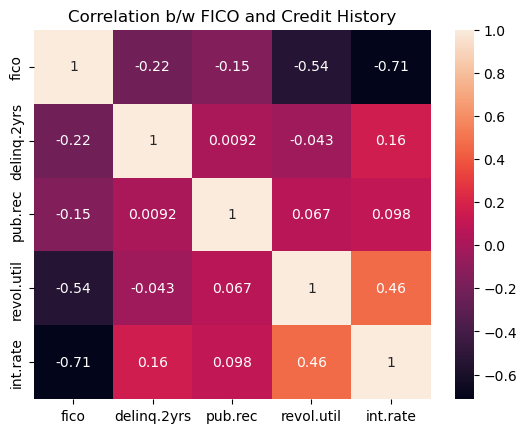

In [17]:
correlation_fico_credit = data[['fico', 'delinq.2yrs', 'pub.rec', 'revol.util', 'int.rate']]
correlation_fico_credit_matrix = correlation_fico_credit.corr()
sns.heatmap(correlation_fico_credit_matrix, annot=True)
plt.title("Correlation b/w FICO and Credit History")
plt.show()

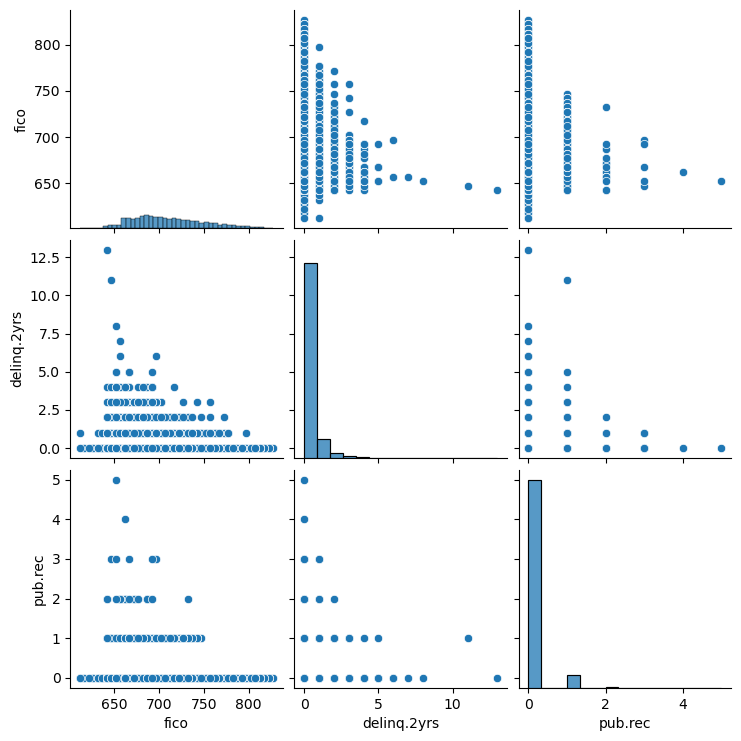

In [18]:
sns.pairplot(data[['fico', 'delinq.2yrs', 'pub.rec']])
plt.show()

# Trends from Revolving Utilization and Balance:
High revolving utilization and balances might indicate:

1. Higher credit dependency and potential financial stress.
2. Higher risk of default or delinquency.
3. Lower ability to manage debt effectively.

1st method

In [19]:
revolving_trends = data[["revol.util", "revol.bal"]]
high_revolving_utilization_customers = data[data["revol.util"] > 0.7]

In [20]:
high_revolving_utilization_customers

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encoded,loan_combination_score
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2,98.579990
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,24.442362
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2,49.782902
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2,16.363872
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,50.369436
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,32.289810
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,2,10.475451
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,4,56.252800


2nd method

In [21]:
revolving_trends = data.groupby("revol.util").agg({"revol.bal": "mean"})

In [22]:
revolving_trends

,revol.bal
revol.util,
0.00,5941.377104
0.04,0.000000
0.10,1385.904762
0.20,2715.450000
0.30,1294.681818
...,...
106.20,7966.000000
106.40,5319.000000
106.50,4473.000000


# Beneficial Loan Purpose:
The "purpose" category that's most beneficial to the business would depend on the company's risk appetite and profitability goals. Some purposes might have lower default rates, like "debt_consolidation" which indicates borrowers are consolidating debt to manage payments better.

In [34]:
purpose_group = data.groupby('purpose')['int.rate'].mean()
most_beneficial_purpose = purpose_group.idxmax()

In [24]:
most_beneficial_purpose

'small_business'

In [27]:
purpose_benefits = data.groupby('purpose')['credit.policy'].mean().sort_values(ascending=False)
print(purpose_benefits)

purpose
major_purchase        0.848970
debt_consolidation    0.814506
home_improvement      0.813990
credit_card           0.808241
small_business        0.799677
all_other             0.787216
educational           0.740525
Name: credit.policy, dtype: float64


# Days with Credit Line and Loan Repayment:
Longer days with a credit line might indicate:

1. A longer credit history, potentially associated with responsible credit behavior.
2. A positive credit history might contribute to better loan repayment behavior.

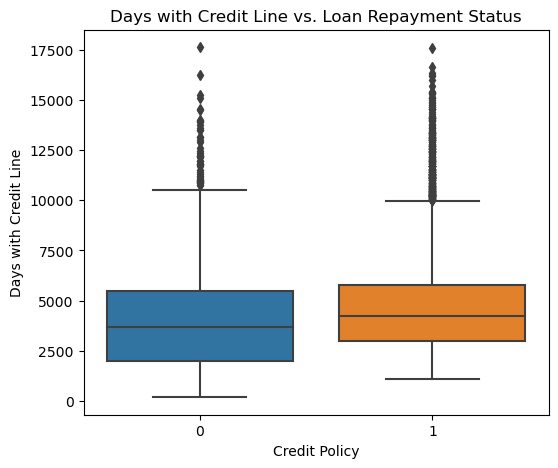

In [28]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x='credit.policy', y='days.with.cr.line')
plt.title("Days with Credit Line vs. Loan Repayment Status")
plt.xlabel("Credit Policy")
plt.ylabel("Days with Credit Line")
plt.show()

# Credit History and Meeting Credit Policy:
Borrowers with a longer credit history might have a better chance of meeting the credit policy criteria due to their established financial behavior. However, credit history alone is not the sole determinant, as factors like recent delinquencies and credit utilization also play a role.

In [29]:
credit_history_vs_policy = data.groupby('credit.policy')['days.with.cr.line'].mean()
print(credit_history_vs_policy)

credit.policy
0    4058.456304
1    4682.468461
Name: days.with.cr.line, dtype: float64


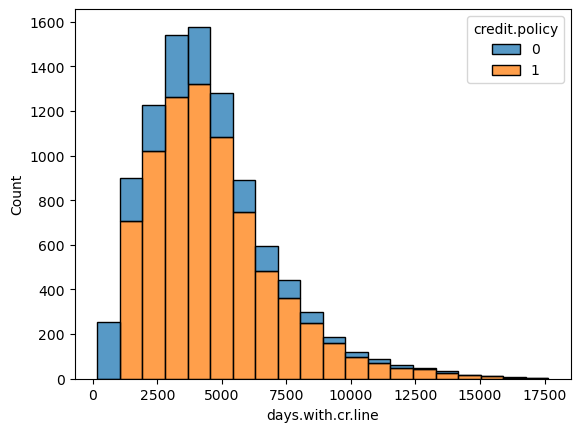

In [30]:
credit_history_credit_policy = data[['days.with.cr.line', 'credit.policy']]
sns.histplot(data=credit_history_credit_policy, x='days.with.cr.line', hue='credit.policy', bins=20,multiple='stack')
plt.show()